In [1]:
from google.colab import drive    
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pickle 
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.utils import shuffle  
from keras.models import Sequential  
from keras.layers import Activation, Dropout, UpSampling2D  
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D  
from tensorflow.keras.layers import BatchNormalization 
from keras.preprocessing.image import ImageDataGenerator  
from keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
with open("/content/drive/MyDrive/Lane_navigation/full_CNN_train.p", "rb") as image_file:     
  images = pickle.load(image_file)
with open("/content/drive/MyDrive/Lane_navigation/full_CNN_labels.p", "rb") as label_file:     
  labels = pickle.load(label_file)

In [4]:
train_images = np.array(images)      
labels = np.array(labels) 
labels = labels / 255 
train_images, labels = shuffle(train_images, labels)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_images, labels, test_size=0.2)

In [6]:
def create_model(input_shape, pool_size):             
  model = Sequential()             
  model.add(BatchNormalization(input_shape=input_shape))              
  model.add(Conv2D(8, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv1'))              
  model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv2'))              
  model.add(MaxPooling2D(pool_size=pool_size))         
  model.add(Conv2D(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv3'))        
  model.add(Dropout(0.2))            
  model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv4'))        
  model.add(Dropout(0.2))           
  model.add(Conv2D(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv5'))       
  model.add(Dropout(0.2))         
  model.add(MaxPooling2D(pool_size=pool_size))           
  model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv6'))        
  model.add(Dropout(0.2))           
  model.add(Conv2D(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Conv7'))        
  model.add(Dropout(0.2))        
  model.add(MaxPooling2D(pool_size=pool_size))             
  model.add(UpSampling2D(size=pool_size))         
  model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv1'))        
  model.add(Dropout(0.2))       
  model.add(Conv2DTranspose(64, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv2'))        
  model.add(Dropout(0.2))             
  model.add(UpSampling2D(size=pool_size))       
  model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv3'))       
  model.add(Dropout(0.2))       
  model.add(Conv2DTranspose(32, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv4'))        
  model.add(Dropout(0.2))   
  model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv5'))        
  model.add(Dropout(0.2))          
  model.add(UpSampling2D(size=pool_size))           
  model.add(Conv2DTranspose(16, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Deconv6'))           
  model.add(Conv2DTranspose(1, (3, 3), padding='valid', strides=(1,1), activation = 'relu', name = 'Final'))         
  return model

In [7]:
batch_size = 64      
epochs = 10  
pool_size = (2, 2)      
input_shape = X_train.shape[1:]          
model = create_model(input_shape, pool_size)        
datagen = ImageDataGenerator(channel_shift_range=0.2)      
datagen.fit(X_train)

In [8]:
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=["accuracy"])      
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,                          
                              epochs=epochs, 
                              verbose=1)          
model.trainable = False      
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=["accuracy"])

<ipython-input-8-aa234fd2bce2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), steps_per_epoch=len(X_train)/batch_size,


Epoch 1/10
159/159 [==============================] - 28s 100ms/step - loss: 0.0349 - accuracy: 0.9299
Epoch 2/10
159/159 [==============================] - 14s 88ms/step - loss: 0.0121 - accuracy: 0.9546
Epoch 3/10
159/159 [==============================] - 14s 89ms/step - loss: 0.0097 - accuracy: 0.9564
Epoch 4/10
159/159 [==============================] - 15s 93ms/step - loss: 0.0089 - accuracy: 0.9568
Epoch 5/10
159/159 [==============================] - 16s 98ms/step - loss: 0.0083 - accuracy: 0.9573
Epoch 6/10
159/159 [==============================] - 14s 88ms/step - loss: 0.0079 - accuracy: 0.9575
Epoch 7/10
159/159 [==============================] - 14s 89ms/step - loss: 0.0077 - accuracy: 0.9577
Epoch 8/10
159/159 [==============================] - 14s 89ms/step - loss: 0.0075 - accuracy: 0.9579
Epoch 9/10
159/159 [==============================] - 14s 88ms/step - loss: 0.0073 - accuracy: 0.9581
Epoch 10/10
159/159 [==============================] - 14s 88ms/step - loss: 0.00

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)   
print('test_acc:', test_acc)

80/80 [==============================] - 1s 16ms/step - loss: 0.0058 - accuracy: 0.9600
test_acc: 0.9600425958633423


In [9]:
import matplotlib.pyplot as plt

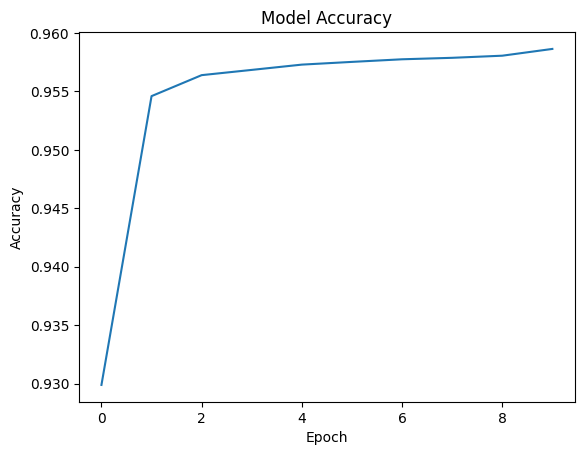

In [13]:
plt.plot(history.history['accuracy']) 
plt.title('Model Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.show()